# Data Selection

- You need to search for open datasets, 
 - Import some medical data 
 - Manipulate the data by using 
   - Appropriate visualisation tools 
   - Or libraries of your choice. 
 - The visualisation of the chosen dataset 
   - Must be documented with providing rationale behind using either of the tools
   - And its relevance in the healthcare sector.
- Data.gov.uk

# Data Preparation

- Assess the quality of your data using suitable techniques. 
- Clean the data if and as necessary. 
- Your report should document and justify any techniques you have utilised 
  - to assess the quality of the data. 
  - Your justification must be informed by research.

In [1]:
import pandas as pd

filename = 'file.xlsx'
df = pd.read_excel(filename)
df

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDateRate
0,2020-03-11,South West,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,2020-03-12,South West,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN
2,2020-03-13,South West,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN
3,2020-03-14,South West,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN
4,2020-03-15,South West,NaN,NaN,NaN,NaN,NaN,1.0,3.0,0.1
...,...,...,...,...,...,...,...,...,...,...
4025,2021-12-08,North West,4919.0,NaN,19.0,20520.0,278.5,13.0,20558.0,279.0
4026,2021-12-09,North West,4066.0,NaN,13.0,20533.0,278.7,7.0,20565.0,279.1
4027,2021-12-10,North West,4886.0,NaN,17.0,20550.0,278.9,4.0,20569.0,279.2
4028,2021-12-11,North West,6004.0,NaN,19.0,20569.0,279.2,2.0,20571.0,279.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4030 entries, 0 to 4029
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              4030 non-null   datetime64[ns]
 1   areaName                          4030 non-null   object        
 2   newCasesByPublishDate             3787 non-null   float64       
 3   cumCasesByPublishDate             7 non-null      float64       
 4   newDeaths28DaysByPublishDate      3035 non-null   float64       
 5   cumDeaths28DaysByPublishDate      3055 non-null   float64       
 6   cumDeaths28DaysByPublishDateRate  3055 non-null   float64       
 7   newDeaths28DaysByDeathDate        4022 non-null   float64       
 8   cumDeaths28DaysByDeathDate        4023 non-null   float64       
 9   cumDeaths28DaysByDeathDateRate    3988 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memo

In [3]:
df[['date', 'areaName', 'newCasesByPublishDate','newDeaths28DaysByPublishDate']]

,date,areaName,newCasesByPublishDate,newDeaths28DaysByPublishDate
0,2020-03-11,South West,NaN,NaN
1,2020-03-12,South West,NaN,NaN
2,2020-03-13,South West,NaN,NaN
3,2020-03-14,South West,NaN,NaN
4,2020-03-15,South West,NaN,NaN
...,...,...,...,...
4025,2021-12-08,North West,4919.0,19.0
4026,2021-12-09,North West,4066.0,13.0
4027,2021-12-10,North West,4886.0,17.0
4028,2021-12-11,North West,6004.0,19.0


In [4]:
df[['date', 'areaName', 'cumCasesByPublishDate','cumDeaths28DaysByPublishDate','cumDeaths28DaysByPublishDateRate']]

,date,areaName,cumCasesByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
0,2020-03-11,South West,NaN,NaN,NaN
1,2020-03-12,South West,NaN,NaN,NaN
2,2020-03-13,South West,NaN,NaN,NaN
3,2020-03-14,South West,NaN,NaN,NaN
4,2020-03-15,South West,NaN,NaN,NaN
...,...,...,...,...,...
4025,2021-12-08,North West,NaN,20520.0,278.5
4026,2021-12-09,North West,NaN,20533.0,278.7
4027,2021-12-10,North West,NaN,20550.0,278.9
4028,2021-12-11,North West,NaN,20569.0,279.2


In [5]:
df['areaName'].value_counts()

East of England             651
East Midlands               650
North West                  645
London                      644
South West                  642
Yorkshire and The Humber    641
South East                  157
Name: areaName, dtype: int64

In [6]:
# South East first entry date
southEast = df['areaName']=='South East'
df[southEast]['date'].head(1)

642   2021-07-09
Name: date, dtype: datetime64[ns]

In [7]:
# Removing South East data
# filterSE = df['areaName']=='South East'
# SE = df[filterSE]
# SE
df = df[df.areaName != 'South East']

In [8]:
# Cumulative data as stated by record
dateFilter = df['date']=='2021-12-12'
cumData = df[dateFilter][['date', 'areaName', 'cumCasesByPublishDate','cumDeaths28DaysByPublishDate','cumDeaths28DaysByPublishDateRate']]
cumData.sort_values(by=['areaName'])

,date,areaName,cumCasesByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
2743,2021-12-12,East Midlands,813192.0,11607.0,238.6
2093,2021-12-12,East of England,942726.0,14795.0,236.0
1442,2021-12-12,London,1381289.0,17183.0,190.9
4029,2021-12-12,North West,1360063.0,20571.0,279.2
641,2021-12-12,South West,797168.0,8100.0,143.1
3384,2021-12-12,Yorkshire and The Humber,954088.0,12990.0,235.1


In [9]:
# Cumulative as calculated by Sum 2020-2021
filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'
filterSE = df['areaName']=='South East'

EM = df[filterEM]['newCasesByPublishDate']
EOE = df[filterEOE]['newCasesByPublishDate']
L = df[filterL]['newCasesByPublishDate']
NW = df[filterNW]['newCasesByPublishDate']
SE = df[filterSE]['newCasesByPublishDate']
SW = df[filterSW]['newCasesByPublishDate']
YH = df[filterYH]['newCasesByPublishDate']
Total = df['newCasesByPublishDate']

print('EM :', EM.sum())
print('EOE:', EOE.sum())
print('L  :', L.sum())
print('NW :', NW.sum())

# Differant due to missing records comparatively - Exclude
print('SW :', SW.sum())
print('YH :', YH.sum())
print('Total:', Total.sum())

EM : 809272.0
EOE: 938353.0
L  : 1362773.0
NW : 1349027.0
SW : 794315.0
YH : 948471.0
Total: 6202211.0


In [10]:
# Cumulative as calculated by Sum 2021
dateFilter = df['date']>='2021-01-01'

print('EM :', EM[dateFilter].sum())
print('EOE:', EOE[dateFilter].sum())
print('L  :', L[dateFilter].sum())
print('NW :', NW[dateFilter].sum())
# Excluded South East - print('SE :', SE[dateFilter].sum())
print('SW :', SW[dateFilter].sum())
print('YH :', YH[dateFilter].sum())
print('Total:', Total[dateFilter].sum())


EM : 628323.0
EOE: 751307.0
L  : 1012336.0
NW : 992673.0
SW : 683773.0
YH : 698333.0
Total: 4766745.0


In [11]:
# Deleteing col newDeaths28DaysByDeathDate, cumDeaths28DaysByDeathDate, cumDeaths28DaysByDeathDateRate

df=df.drop(columns=['newDeaths28DaysByDeathDate','cumDeaths28DaysByDeathDate','cumDeaths28DaysByDeathDateRate'])
dateFilter = df['date']>='2021-01-01'
data = df[dateFilter]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 296 to 4029
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              2076 non-null   datetime64[ns]
 1   areaName                          2076 non-null   object        
 2   newCasesByPublishDate             2076 non-null   float64       
 3   cumCasesByPublishDate             6 non-null      float64       
 4   newDeaths28DaysByPublishDate      2076 non-null   float64       
 5   cumDeaths28DaysByPublishDate      2076 non-null   float64       
 6   cumDeaths28DaysByPublishDateRate  2076 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 129.8+ KB


In [12]:
# Creating NumPy Array as some libraries prefer it
dateFilter = df['date']>='2021-01-01'
data = df[dateFilter]
data.values

array([[Timestamp('2021-01-01 00:00:00'), 'South West', 2104.0, ...,
        30.0, 3422.0, 60.5],
       [Timestamp('2021-01-02 00:00:00'), 'South West', 3093.0, ...,
        13.0, 3435.0, 60.7],
       [Timestamp('2021-01-03 00:00:00'), 'South West', 2337.0, ...,
        21.0, 3456.0, 61.1],
       ...,
       [Timestamp('2021-12-10 00:00:00'), 'North West', 4886.0, ...,
        17.0, 20550.0, 278.9],
       [Timestamp('2021-12-11 00:00:00'), 'North West', 6004.0, ...,
        19.0, 20569.0, 279.2],
       [Timestamp('2021-12-12 00:00:00'), 'North West', 4428.0, ..., 2.0,
        20571.0, 279.2]], dtype=object)

In [13]:
dateFilter = df['date']>='2021-01-01'
data = df[dateFilter]

data.head()

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
296,2021-01-01,South West,2104.0,NaN,30.0,3422.0,60.5
297,2021-01-02,South West,3093.0,NaN,13.0,3435.0,60.7
298,2021-01-03,South West,2337.0,NaN,21.0,3456.0,61.1
299,2021-01-04,South West,3316.0,NaN,19.0,3475.0,61.4
300,2021-01-05,South West,2972.0,NaN,46.0,3521.0,62.2


In [14]:

data.to_excel(excel_writer='data.xlsx', index=False)

# Data Exploration

- Utilise suitable data mining tools 
- and analysis techniques to find 
  - significant patterns and trends 
  - SPSS, Excel, Tableau, WEKA, Python libraries, etc 
- Explain the patterns you have observed.

# Data Modelling and Visualisation

- Use appropriate tools to perform some visualisation on the chosen dataset. 
- The choice is yours, based on your future intention of work 
- And also the familiarity of the tool. 
- Your report should document and justify the techniques you have used to 
  - Mine and analyse the data 
  - And the patterns or trends that were discovered. 
- Finally, construct a model that can make some predictions or forecast trends.

## Cross industry standard process for data minig (CRIPS-DM)

- Business Understanding
- Data Understanding
    - Numerical
        - Ratio - Numbers
    - Nominal
        - Date - Ordinal
        - Catagorical - Area
- Data Preperation
- Modeling
- Evaluation
- Deployment

In [34]:
# Plotting

%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

finename2021 = 'data.xlsx'
df = pd.read_excel(finename2021)

df

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
0,2021-01-01,South West,2104,NaN,30,3422,60.5
1,2021-01-02,South West,3093,NaN,13,3435,60.7
2,2021-01-03,South West,2337,NaN,21,3456,61.1
3,2021-01-04,South West,3316,NaN,19,3475,61.4
4,2021-01-05,South West,2972,NaN,46,3521,62.2
...,...,...,...,...,...,...,...
2071,2021-12-08,North West,4919,NaN,19,20520,278.5
2072,2021-12-09,North West,4066,NaN,13,20533,278.7
2073,2021-12-10,North West,4886,NaN,17,20550,278.9
2074,2021-12-11,North West,6004,NaN,19,20569,279.2


In [35]:
df.head()


,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDateRate
0,2021-01-01,South West,2104,NaN,30,3422,60.5
1,2021-01-02,South West,3093,NaN,13,3435,60.7
2,2021-01-03,South West,2337,NaN,21,3456,61.1
3,2021-01-04,South West,3316,NaN,19,3475,61.4
4,2021-01-05,South West,2972,NaN,46,3521,62.2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              2076 non-null   datetime64[ns]
 1   areaName                          2076 non-null   object        
 2   newCasesByPublishDate             2076 non-null   int64         
 3   cumCasesByPublishDate             6 non-null      float64       
 4   newDeaths28DaysByPublishDate      2076 non-null   int64         
 5   cumDeaths28DaysByPublishDate      2076 non-null   int64         
 6   cumDeaths28DaysByPublishDateRate  2076 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 113.7+ KB


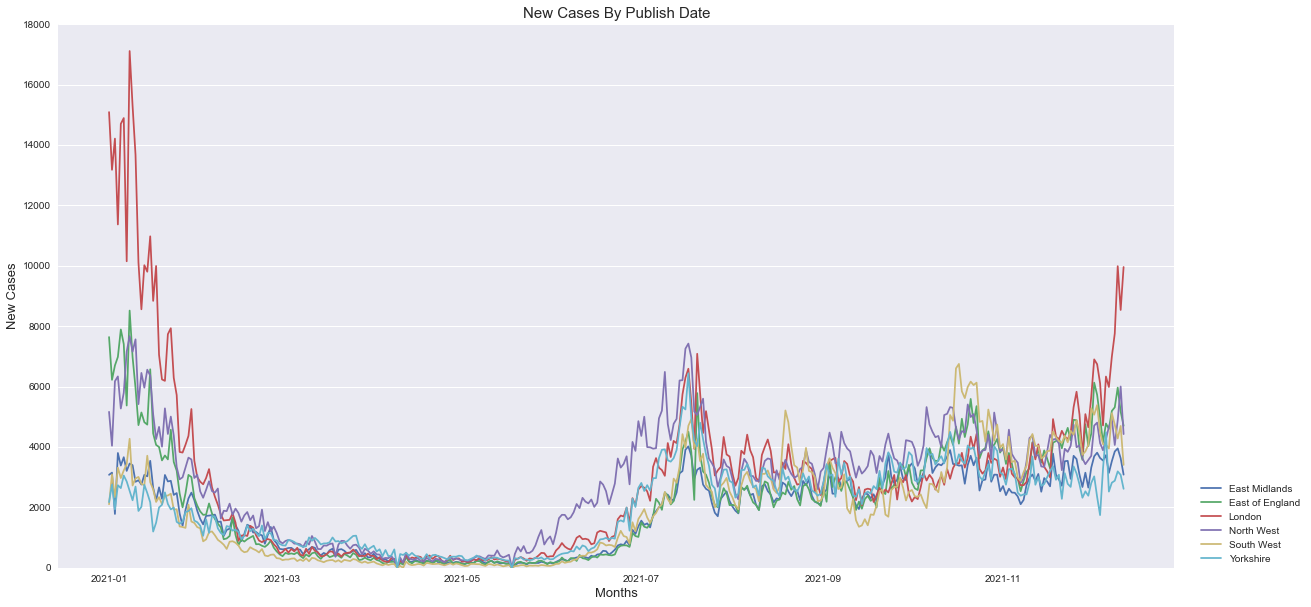

In [39]:
plotDates = df.loc[:, 'date'].values

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'

EM = df[filterEM]['newCasesByPublishDate']
dateEM = df[filterEM]['date']
plotEM = EM.values
plotDateEM = dateEM.values

EOE = df[filterEOE]['newCasesByPublishDate']
dateEOE = df[filterEOE]['date']
plotEOE = EOE.values
plotDateEOE = dateEOE.values

L = df[filterL]['newCasesByPublishDate']
dateL = df[filterL]['date']
plotL = L.values
plotDateL = dateL.values

NW = df[filterNW]['newCasesByPublishDate']
dateNW = df[filterNW]['date']
plotNW = NW.values
plotDateNW = dateNW.values


SW = df[filterSW]['newCasesByPublishDate']
dateSW = df[filterSW]['date']
plotSW = SW.values
plotDateSW = dateSW.values

YH = df[filterYH]['newCasesByPublishDate']
dateYH= df[filterYH]['date']
plotYH = YH.values
plotDateYH = dateYH.values

plt.style.use('seaborn')

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(plotDateEM, plotEM, label= "East Midlands")
plt.plot(plotDateEOE, plotEOE, label= "East of England")
plt.plot(plotDateL, plotL, label= "London")
plt.plot(plotDateNW, plotNW, label='North West')
plt.plot(plotDateSW, plotSW, label='South West')
plt.plot(plotDateYH, plotYH, label='Yorkshire')


plt.ylim(bottom=0, top=18000)
plt.xlabel('Months', fontsize=13)
plt.ylabel('New Cases', fontsize=13)
plt.title('New Cases By Publish Date', fontsize=15)
plt.grid(axis='x')
plt.legend(loc=(1.02,0))

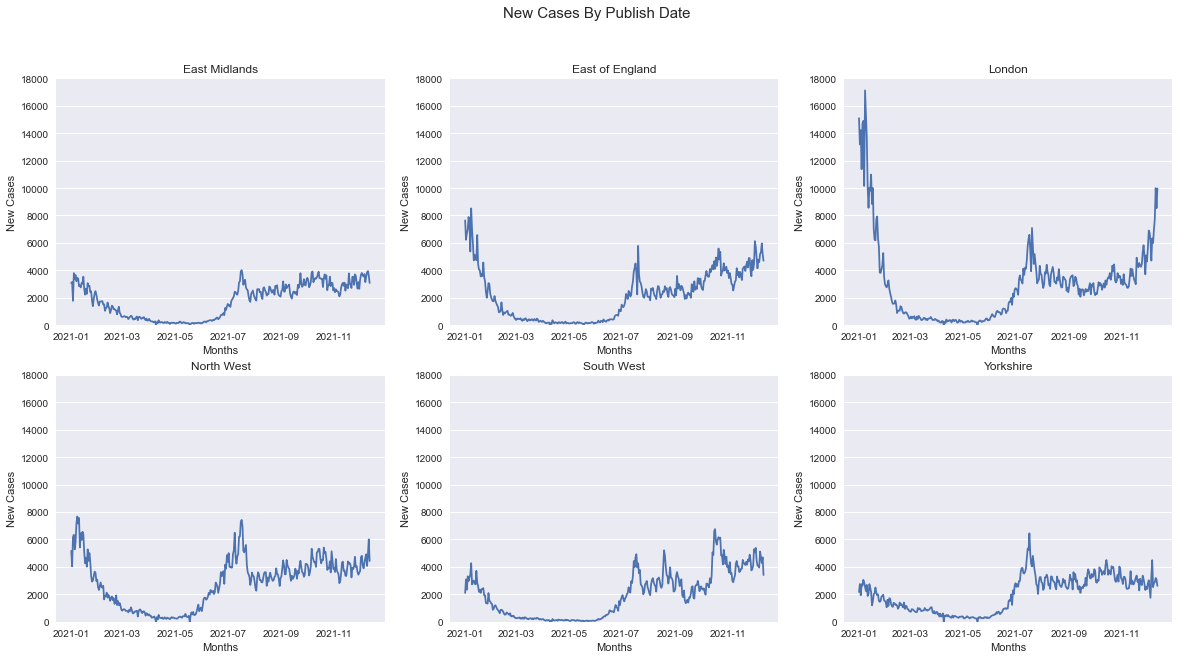

In [42]:
plt.style.use('seaborn')


fig, axs = plt.subplots(2, 3)
fig.suptitle('New Cases By Publish Date', fontsize=15)

axs[0,0].plot(plotDateEM, plotEM, label= "East Midlands")
axs[0,0].set_title("East Midlands")
axs[0,0].set_ylim(bottom=0, top=18000)
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('New Cases')
axs[0,0].grid(axis='x')

axs[0,1].plot(plotDateEOE, plotEOE, label= "East of England")
axs[0,1].set_title("East of England")
axs[0,1].set_ylim(bottom=0, top=18000)
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('New Cases')
axs[0,1].grid(axis='x')

axs[0,2].plot(plotDateL, plotL, label= "London")
axs[0,2].set_title("London")
axs[0,2].set_ylim(bottom=0, top=18000)
axs[0,2].set_xlabel('Months')
axs[0,2].set_ylabel('New Cases')
axs[0,2].grid(axis='x')

axs[1,0].plot(plotDateNW, plotNW, label='North West')
axs[1,0].set_title("North West")
axs[1,0].set_ylim(bottom=0, top=18000)
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('New Cases')
axs[1,0].grid(axis='x')

axs[1,1].plot(plotDateSW, plotSW, label='South West')
axs[1,1].set_title("South West")
axs[1,1].set_ylim(bottom=0, top=18000)
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('New Cases')
axs[1,1].grid(axis='x')

axs[1,2].plot(plotDateYH, plotYH, label='Yorkshire')
axs[1,2].set_title("Yorkshire")
axs[1,2].set_ylim(bottom=0, top=18000)
axs[1,2].set_xlabel('Months')
axs[1,2].set_ylabel('New Cases')
axs[1,2].grid(axis='x')



fig.set_size_inches(20, 10)

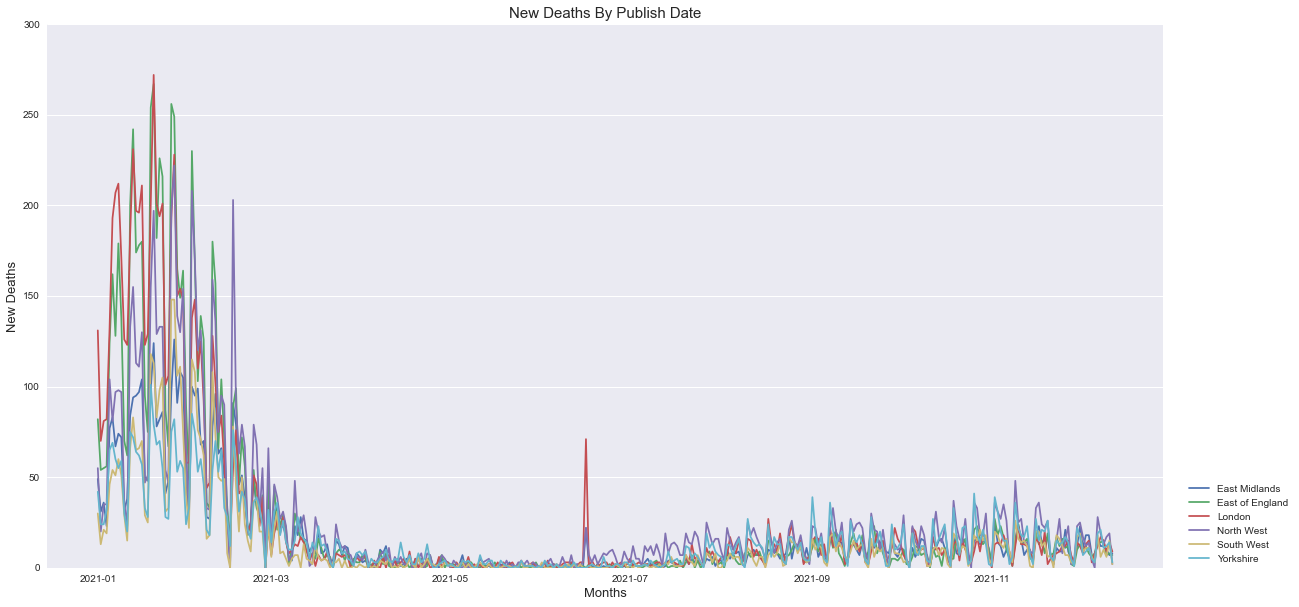

In [43]:
plotDates = df.loc[:, 'date'].values

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'

EM = df[filterEM]['newDeaths28DaysByPublishDate']
dateEM = df[filterEM]['date']
plotEM = EM.values
plotDateEM = dateEM.values

EOE = df[filterEOE]['newDeaths28DaysByPublishDate']
dateEOE = df[filterEOE]['date']
plotEOE = EOE.values
plotDateEOE = dateEOE.values

L = df[filterL]['newDeaths28DaysByPublishDate']
dateL = df[filterL]['date']
plotL = L.values
plotDateL = dateL.values

NW = df[filterNW]['newDeaths28DaysByPublishDate']
dateNW = df[filterNW]['date']
plotNW = NW.values
plotDateNW = dateNW.values


SW = df[filterSW]['newDeaths28DaysByPublishDate']
dateSW = df[filterSW]['date']
plotSW = SW.values
plotDateSW = dateSW.values

YH = df[filterYH]['newDeaths28DaysByPublishDate']
dateYH= df[filterYH]['date']
plotYH = YH.values
plotDateYH = dateYH.values

plt.style.use('seaborn')

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(plotDateEM, plotEM, label= "East Midlands")
plt.plot(plotDateEOE, plotEOE, label= "East of England")
plt.plot(plotDateL, plotL, label= "London")
plt.plot(plotDateNW, plotNW, label='North West')
plt.plot(plotDateSW, plotSW, label='South West')
plt.plot(plotDateYH, plotYH, label='Yorkshire')


plt.ylim(bottom=0, top=300)
plt.xlabel('Months', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.title('New Deaths By Publish Date', fontsize=15)
plt.grid(axis='x')
plt.legend(loc=(1.02,0))

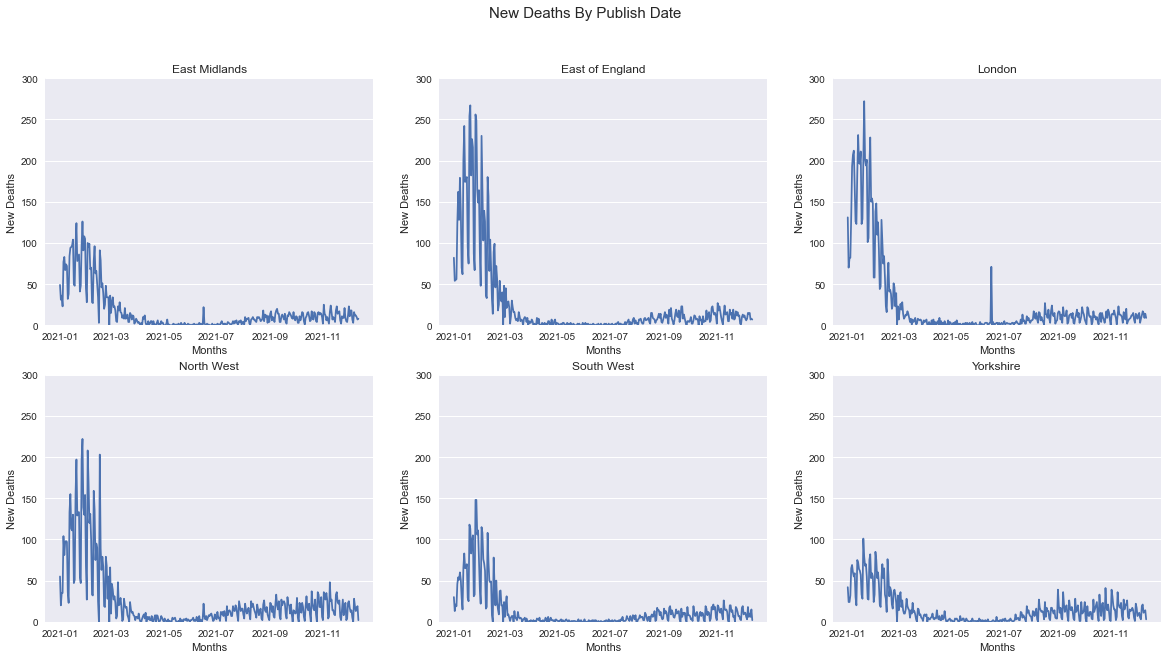

In [44]:
plt.style.use('seaborn')


fig, axs = plt.subplots(2, 3)
fig.suptitle('New Deaths By Publish Date', fontsize=15)

axs[0,0].plot(plotDateEM, plotEM, label= "East Midlands")
axs[0,0].set_title("East Midlands")
axs[0,0].set_ylim(bottom=0, top=300)
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('New Deaths')
axs[0,0].grid(axis='x')

axs[0,1].plot(plotDateEOE, plotEOE, label= "East of England")
axs[0,1].set_title("East of England")
axs[0,1].set_ylim(bottom=0, top=300)
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('New Deaths')
axs[0,1].grid(axis='x')

axs[0,2].plot(plotDateL, plotL, label= "London")
axs[0,2].set_title("London")
axs[0,2].set_ylim(bottom=0, top=300)
axs[0,2].set_xlabel('Months')
axs[0,2].set_ylabel('New Deaths')
axs[0,2].grid(axis='x')

axs[1,0].plot(plotDateNW, plotNW, label='North West')
axs[1,0].set_title("North West")
axs[1,0].set_ylim(bottom=0, top=300)
axs[1,0].set_xlabel('Months')
axs[1,0].set_ylabel('New Deaths')
axs[1,0].grid(axis='x')

axs[1,1].plot(plotDateSW, plotSW, label='South West')
axs[1,1].set_title("South West")
axs[1,1].set_ylim(bottom=0, top=300)
axs[1,1].set_xlabel('Months')
axs[1,1].set_ylabel('New Deaths')
axs[1,1].grid(axis='x')

axs[1,2].plot(plotDateYH, plotYH, label='Yorkshire')
axs[1,2].set_title("Yorkshire")
axs[1,2].set_ylim(bottom=0, top=300)
axs[1,2].set_xlabel('Months')
axs[1,2].set_ylabel('New Deaths')
axs[1,2].grid(axis='x')



fig.set_size_inches(20, 10)

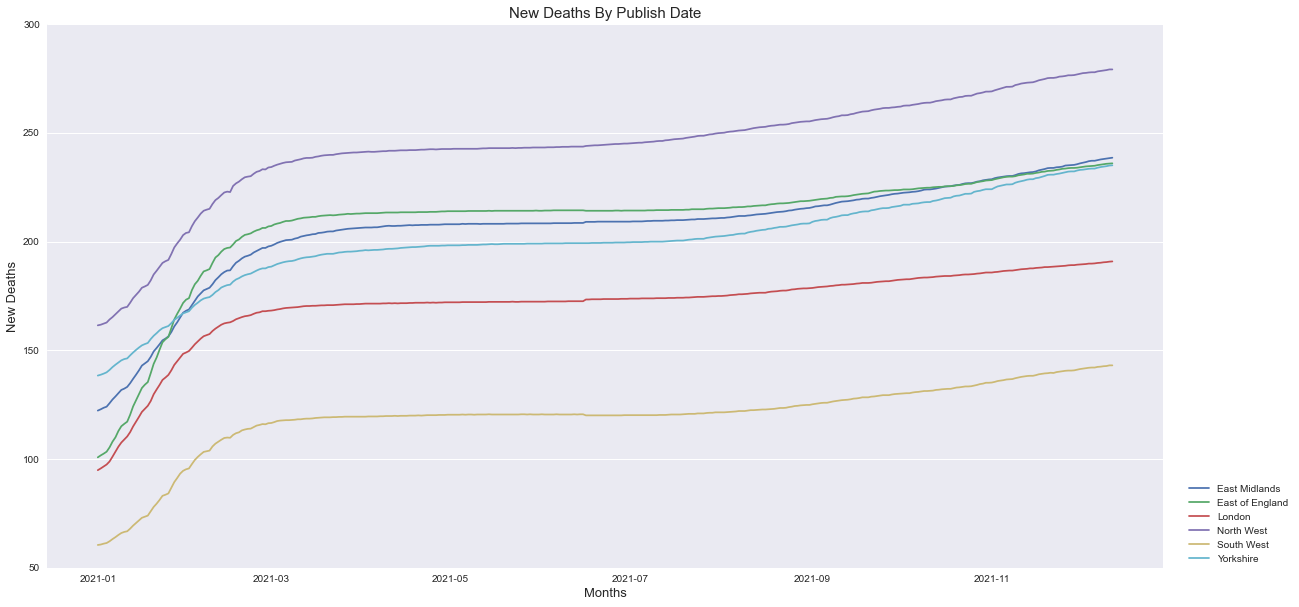

In [45]:
plotDates = df.loc[:, 'date'].values

filterEOE = df['areaName']=='East of England'
filterEM = df['areaName']=='East Midlands'
filterNW = df['areaName']=='North West'
filterL = df['areaName']=='London'
filterSW = df['areaName']=='South West'
filterYH = df['areaName']=='Yorkshire and The Humber'

EM = df[filterEM]['cumDeaths28DaysByPublishDateRate']
dateEM = df[filterEM]['date']
plotEM = EM.values
plotDateEM = dateEM.values

EOE = df[filterEOE]['cumDeaths28DaysByPublishDateRate']
dateEOE = df[filterEOE]['date']
plotEOE = EOE.values
plotDateEOE = dateEOE.values

L = df[filterL]['cumDeaths28DaysByPublishDateRate']
dateL = df[filterL]['date']
plotL = L.values
plotDateL = dateL.values

NW = df[filterNW]['cumDeaths28DaysByPublishDateRate']
dateNW = df[filterNW]['date']
plotNW = NW.values
plotDateNW = dateNW.values


SW = df[filterSW]['cumDeaths28DaysByPublishDateRate']
dateSW = df[filterSW]['date']
plotSW = SW.values
plotDateSW = dateSW.values

YH = df[filterYH]['cumDeaths28DaysByPublishDateRate']
dateYH= df[filterYH]['date']
plotYH = YH.values
plotDateYH = dateYH.values

plt.style.use('seaborn')

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(plotDateEM, plotEM, label= "East Midlands")
plt.plot(plotDateEOE, plotEOE, label= "East of England")
plt.plot(plotDateL, plotL, label= "London")
plt.plot(plotDateNW, plotNW, label='North West')
plt.plot(plotDateSW, plotSW, label='South West')
plt.plot(plotDateYH, plotYH, label='Yorkshire')


plt.ylim(bottom=50, top=300)
plt.xlabel('Months', fontsize=13)
plt.ylabel('New Deaths', fontsize=13)
plt.title('New Deaths By Publish Date', fontsize=15)
plt.grid(axis='x')
plt.legend(loc=(1.02,0))

In [47]:
# Cumulative data as stated by record

dateFilter = df['date']=='2021-12-12'
cumData = df[dateFilter][['date', 'areaName', 'cumCasesByPublishDate']]
cumData.sort_values(by=['areaName'])

,date,areaName,cumCasesByPublishDate
1383,2021-12-12,East Midlands,813192.0
1037,2021-12-12,East of England,942726.0
691,2021-12-12,London,1381289.0
2075,2021-12-12,North West,1360063.0
345,2021-12-12,South West,797168.0
1729,2021-12-12,Yorkshire and The Humber,954088.0


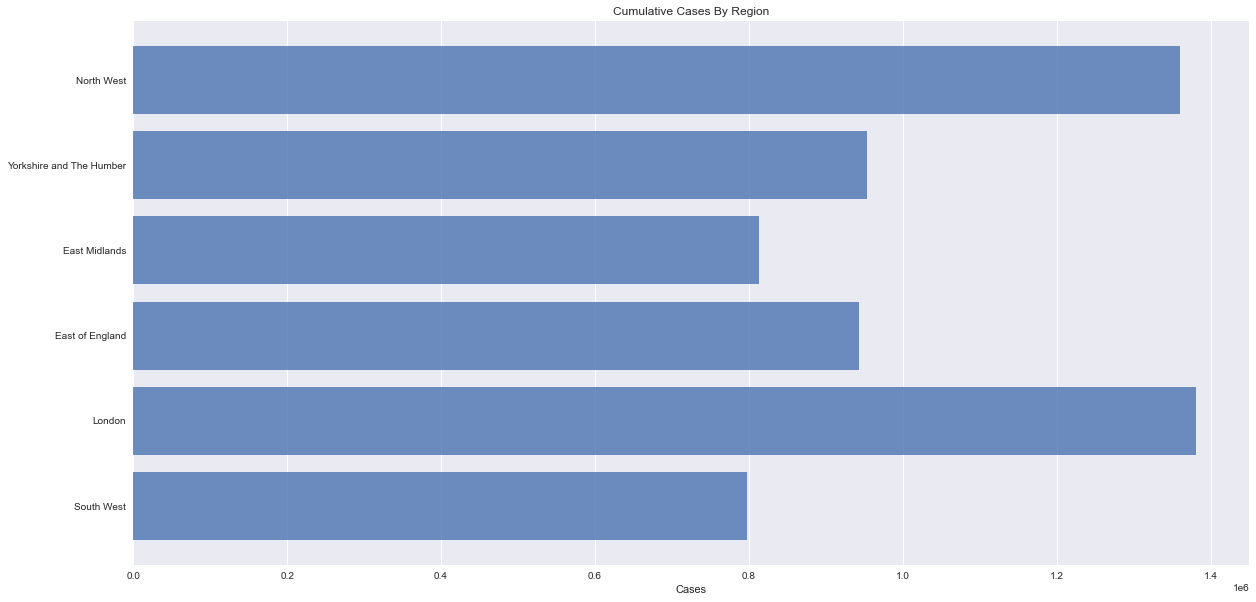

In [48]:
# create plot
objects = cumData['areaName'].values
y_pos = np.arange(len(objects))
performance = cumData['cumCasesByPublishDate'].values

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)


plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('Cases')
plt.title('Cumulative Cases By Region')
plt.grid(axis='y')
plt.show()




In [49]:
# Cumulative data as stated by record

dateFilter = df['date']=='2021-12-12'
cumDeathData = df[dateFilter][['date', 'areaName', 'cumDeaths28DaysByPublishDate']]
cumDeathData.sort_values(by=['areaName'])

,date,areaName,cumDeaths28DaysByPublishDate
1383,2021-12-12,East Midlands,11607
1037,2021-12-12,East of England,14795
691,2021-12-12,London,17183
2075,2021-12-12,North West,20571
345,2021-12-12,South West,8100
1729,2021-12-12,Yorkshire and The Humber,12990


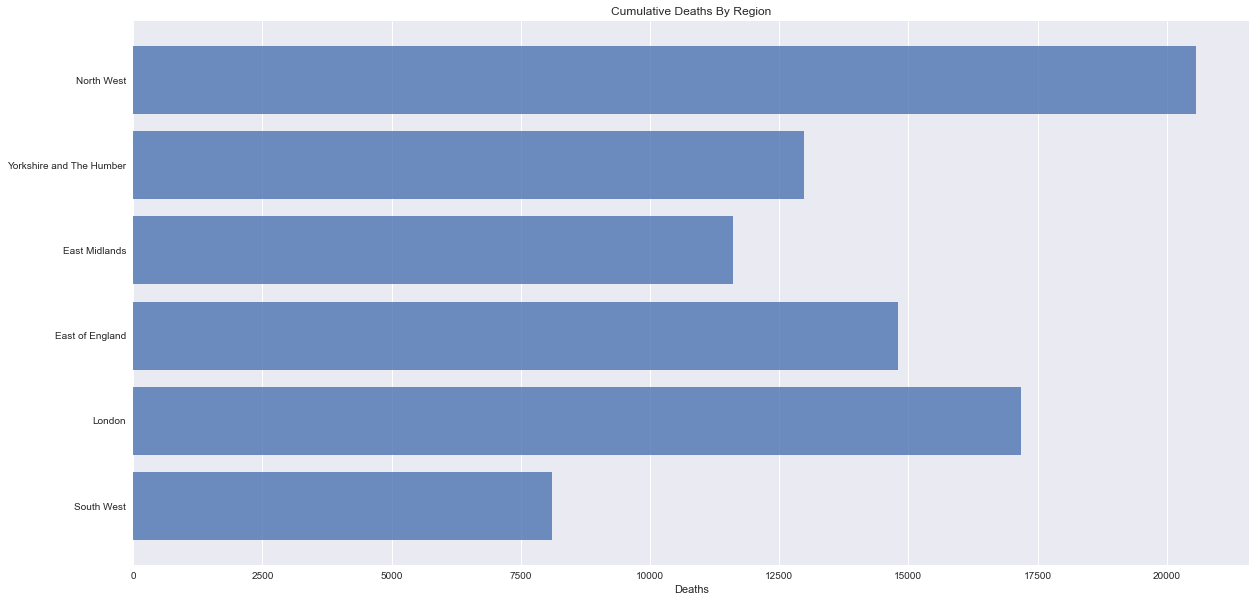

In [50]:
# create plot
objects = cumDeathData['areaName'].values
y_pos = np.arange(len(objects))
performance = cumDeathData['cumDeaths28DaysByPublishDate'].values

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)


plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('Deaths')
plt.title('Cumulative Deaths By Region')
plt.grid(axis='y')
plt.show()



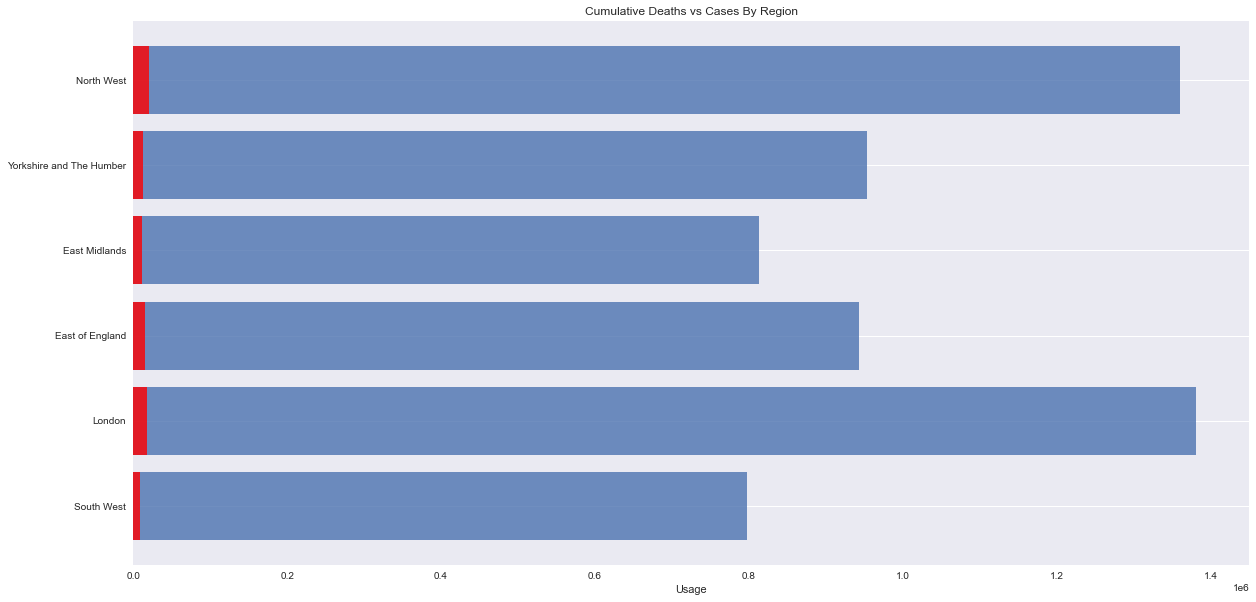

In [52]:
# data set
dateFilter = df['date']=='2021-12-12'
cumDeathData = df[dateFilter][['date', 'areaName', 'cumDeaths28DaysByPublishDate']]
cumData = df[dateFilter][['date', 'areaName', 'cumCasesByPublishDate']]

x = cumDeathData['areaName'].values
y1 = cumDeathData['cumDeaths28DaysByPublishDate'].values
y2 = cumData['cumCasesByPublishDate'].values

# plot stacked bar chart 
 
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.barh(x, y2, alpha=0.8 )
plt.barh(x, y1, color='r', alpha=0.8)

plt.xlabel('Usage')
plt.title('Cumulative Deaths vs Cases By Region')
plt.grid(axis='x')


# Prediction Model

- Finally, construct a model that can make some predictions or forecast trends.

## Cross industry standard process for data minig (CRIPS-DM)

- Business Understanding
- Data Understanding
    - Numerical
        - Ratio - Numbers
    - Nominal
        - Date - Ordinal
        - Catagorical - Area
- Data Preperation
    - Choosing 2021
    - Fixing Mismatched cumVals
    - Solving Nan Values
    - Removing unncecesary col
    - Convert catagorical data into nums
    - Split Data
        - Train - to train data - builds the model
        - Test - to test data - meassures success
        
- Modeling
- Evaluation
- Deployment

Test RMSE: 1296.971


/Users/justginger/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


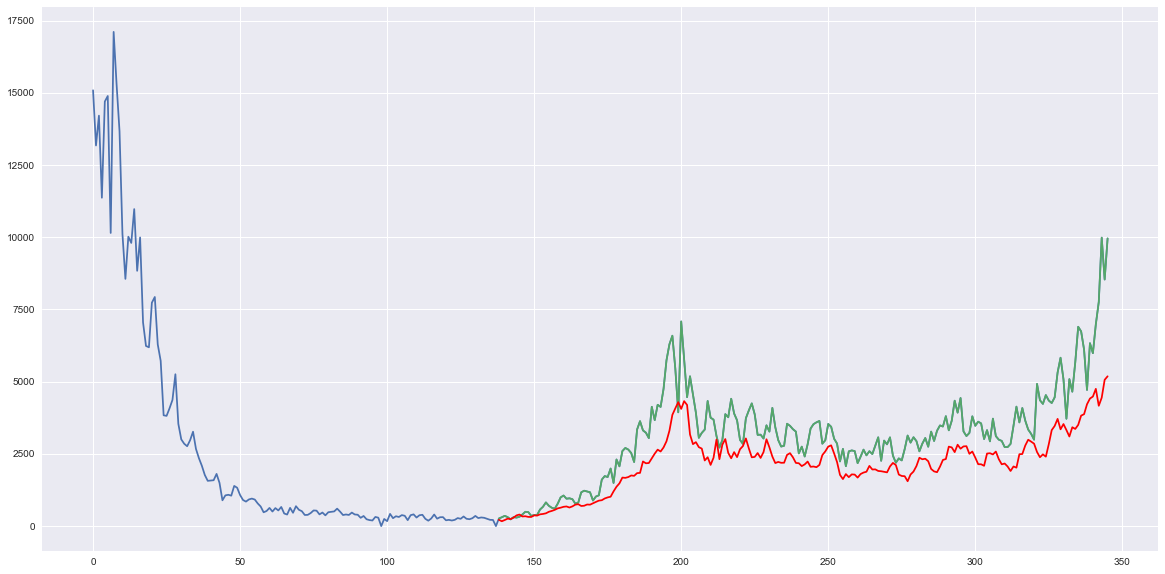

In [53]:

from pickle import TRUE
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

filename = 'data.xlsx'
df = pd.read_excel(filename)

filterEM = df['areaName']=='London'
df = df[filterEM]

df = df[['date', 'newCasesByPublishDate']]


# fit an AR model and save the whole model to file
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy

# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)




# split dataset
X = df['newCasesByPublishDate'].values
Y = df['date'].values

size = int(len(X) * 0.4)
train, test = X[0:size], X[size:]
# train autoregression
model = AutoReg(train, lags=32)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
testing = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	testing.append(test[t])
	history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


# plot
fill = len(X)-len(test)
fillArr = []
for x in range(fill):
  fillArr.append(None)
predictions = fillArr + predictions
testing = fillArr + testing

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(X)
plt.plot(testing)
plt.plot(predictions, color='red')
plt.show()

# Evaluation

- Critically evaluate your results 
- and compare your findings to other similar studies.